<a href="https://colab.research.google.com/github/Stepan229/1234/blob/master/%D0%93%D1%80%D0%B0%D1%84%D0%B8%D0%BA%20%D1%81%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd     
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()


In [3]:
#Получение и чтение файла из облака
url = "https://drive.google.com/uc?export=download&id=1-4d2LnvzP-0y9j3v6zMzz5lytu6Gdm_o"
input_df = pd.read_csv(url, sep = '\t')
input_df.head()
   

,Фабрика_1,Фабрика_2,Разрез
0,1466.70,1056.0,320.0
1,1681.20,1135.0,322.0
2,1638.96,1106.0,320.0
3,1574.00,1171.0,318.0
4,1543.64,1176.0,320.0


In [0]:
input_df.tail()

,Фабрика_1,Фабрика_2,Разрез
8755,1812.30,1264.0,259.15
8756,1631.84,1205.0,268.53
8757,1818.64,1106.0,287.49
8758,1771.30,1121.0,268.06
8759,1819.84,1197.0,257.50


In [4]:
input_matrix = input_df.values # перевод таблицы в матрицу
print('размерность матрицы', input_matrix.shape)
print(range(len(input_matrix)))
m = np.zeros((8760,3))

n = np.zeros((1,3))
k = (len(input_matrix))-1
print(k)
for i in range(k):
    m = input_matrix[i+1,] - input_matrix[i,]
    n = np.vstack((n, m))
print(n)
print('размерность матрицы', n.shape)


размерность матрицы (8760, 3)
range(0, 8760)
8759
[[  0.     0.     0.  ]
 [214.5   79.     2.  ]
 [-42.24 -29.    -2.  ]
 ...
 [186.8  -99.    18.96]
 [-47.34  15.   -19.43]
 [ 48.54  76.   -10.56]]
размерность матрицы (8760, 3)


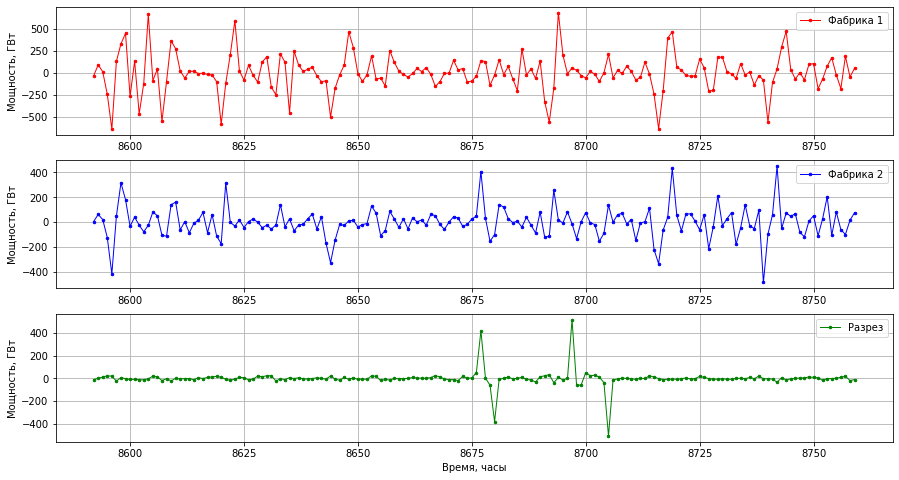

In [12]:
# вначале создать объект для рисования на нем
fig, ax = plt.subplots(3, 1, figsize = (15, 8))
timestamps = range(0, n.shape[0])
begin = 8592
end = 8760
step = 1

ax[0].plot(timestamps[begin : end : step], n[begin : end : step, 0], 'red',  marker = '.', linewidth = 1, markersize = 5)
ax[1].plot(timestamps[begin : end : step], n[begin : end : step, 1], 'blue', marker = '.', markersize = 5, linewidth = 1)
ax[2].plot(timestamps[begin : end : step], n[begin : end : step, 2], 'green', marker = '.', markersize = 5, linewidth = 1)
legend = ['Фабрика 1', 'Фабрика 2', 'Разрез']
for _ in zip(ax, legend):
  _[0].set_ylabel('Мощность, ГВт')
  _[0].legend([_[1]])
  _[0].grid(True)
  
ax[-1].set_xlabel('Время, часы')


In [38]:

p = figure(plot_width = 900, plot_height = 300, title="Фабрика 1")
p.line(np.arange(end-begin), n[begin : end : step, 0], line_width = 2)


show(p)
data_frame = pd.DataFrame(n[begin : end : step, 0])
data_frame.to_excel('factory 1.xlsx', index = False, header = ['dif'])

